In [61]:
# 1: Reading csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv('imdb_top_2000_movies.csv')


In [63]:
# 2: Genre One Hot Encoding
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['Genre'].str.split(', '))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df_encoded = pd.concat([df, genres_df], axis=1)

df_encoded.drop(columns=['Genre'], inplace=True)
print(genres_df.columns)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [64]:
# 3: Test and Training Set Split
X = df_encoded[genres_df.columns.to_list()]
y = df_encoded['IMDB Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=210)
print(X_train.columns)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [66]:
# 4: Simple Linear Reg Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
# Evaluate the model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print(coefficients)

Mean Squared Error: 0.7498255960453255
        Feature  Coefficient
0        Action    -0.402529
1     Adventure    -0.098391
2     Animation     0.479207
3     Biography     0.076321
4        Comedy    -0.397280
5         Crime    -0.045424
6   Documentary     0.025936
7         Drama     0.371840
8        Family    -0.319069
9       Fantasy    -0.225759
10    Film-Noir     0.668115
11      History    -0.119954
12       Horror    -0.495382
13        Music    -0.490571
14      Musical     0.138269
15      Mystery    -0.113684
16      Romance    -0.275872
17       Sci-Fi    -0.179411
18        Sport    -0.307090
19     Thriller    -0.107048
20          War     0.383016
21      Western     0.488075


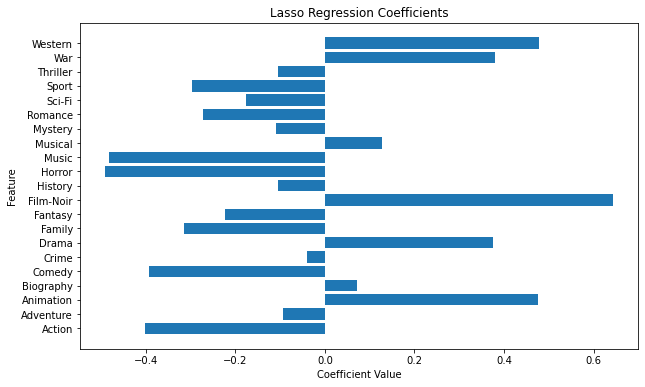

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [59]:
# 5: Lasso Reg for Feature Selection
from sklearn.linear_model import LassoCV
import numpy as np

lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)

selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]

plt.figure(figsize=(10, 6))
plt.barh(selected_features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()
print(selected_features)
